In [1]:
import pandas as pd
import zipfile 
import kaggle
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
#Through this API the data will be downloaded through python as a zip file.
!kaggle datasets download -d martj42/ufc-rankings

ufc-rankings.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
ufc_rankings_import = pd.read_csv('ufc-rankings.zip', compression='zip')
ufc_rankings = ufc_rankings_import.copy()
ufc_rankings

,date,weightclass,fighter,rank
0,2013-02-04,Pound-for-Pound,Anderson Silva,1
1,2013-02-04,Pound-for-Pound,Jon Jones,2
2,2013-02-04,Pound-for-Pound,Georges St. Pierre,3
3,2013-02-04,Pound-for-Pound,José Aldo,4
4,2013-02-04,Pound-for-Pound,Benson Henderson,5
...,...,...,...,...
73633,2023-06-27,Women's Pound-for-Pound,Manon Fiorot,11
73634,2023-06-27,Women's Pound-for-Pound,Amanda Lemos,12
73635,2023-06-27,Women's Pound-for-Pound,Raquel Pennington,13
73636,2023-06-27,Women's Pound-for-Pound,Holly Holm,14


Getting a big picture view of our data

In [4]:
ufc_rankings.info

<bound method DataFrame.info of              date              weightclass             fighter  rank
0      2013-02-04          Pound-for-Pound      Anderson Silva     1
1      2013-02-04          Pound-for-Pound           Jon Jones     2
2      2013-02-04          Pound-for-Pound  Georges St. Pierre     3
3      2013-02-04          Pound-for-Pound           José Aldo     4
4      2013-02-04          Pound-for-Pound    Benson Henderson     5
...           ...                      ...                 ...   ...
73633  2023-06-27  Women's Pound-for-Pound        Manon Fiorot    11
73634  2023-06-27  Women's Pound-for-Pound        Amanda Lemos    12
73635  2023-06-27  Women's Pound-for-Pound   Raquel Pennington    13
73636  2023-06-27  Women's Pound-for-Pound          Holly Holm    14
73637  2023-06-27  Women's Pound-for-Pound      Tatiana Suarez    15

[73638 rows x 4 columns]>

In [5]:
ufc_rankings.shape

(73638, 4)

In [6]:
ufc_rankings.dtypes

date           object
weightclass    object
fighter        object
rank            int64
dtype: object

Converting the columns data type

In [7]:
#converting the weightclass column to category for optimal memory usage since it has a total of 15 unique values.
ufc_rankings['weightclass'].astype("category").nunique

<bound method IndexOpsMixin.nunique of 0                Pound-for-Pound
1                Pound-for-Pound
2                Pound-for-Pound
3                Pound-for-Pound
4                Pound-for-Pound
                  ...           
73633    Women's Pound-for-Pound
73634    Women's Pound-for-Pound
73635    Women's Pound-for-Pound
73636    Women's Pound-for-Pound
73637    Women's Pound-for-Pound
Name: weightclass, Length: 73638, dtype: category
Categories (15, object): ['Bantamweight', 'Featherweight', 'Flyweight', 'Heavyweight', ..., 'Women's Featherweight', 'Women's Flyweight', 'Women's Pound-for-Pound', 'Women's Strawweight']>

In [8]:
#Covnerting date column from Object(string) to datetime
ufc_rankings['date'] = pd.to_datetime(ufc_rankings['date'])
ufc_rankings.dtypes

date           datetime64[ns]
weightclass            object
fighter                object
rank                    int64
dtype: object

Grouping weightclasss and fighter columns as our index using groupby


In [9]:
ufc_rankings_grouped = ufc_rankings.groupby(["fighter","weightclass"])

In [10]:
ufc_rankings_sorted = ufc_rankings_grouped.apply(lambda x: x.sort_values(by='date'))

Using .apply() with lambda gives us back a DataFrame Object. Now we can use .sort_values and sort by 'date'

In [11]:
ufc_rankings_sorted.sort_values(by='date', inplace=True)

In [12]:
#simple filtering
fighter_name = 'Islam Makhachev'
fighter0 = ufc_rankings_sorted[ufc_rankings_sorted['fighter'] == fighter_name]

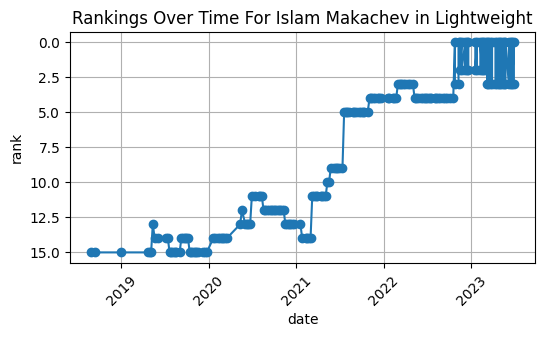

In [13]:
plt.figure(figsize=(6,3))
plt.plot(fighter0['date'], fighter0['rank'], marker ='o', linestyle = '-' )
plt.title('Rankings Over Time For Islam Makachev in Lightweight')
plt.xlabel('date')
plt.ylabel('rank')
plt.xticks(rotation = 45)
plt.grid(True)
plt.gca().invert_yaxis()

As can be viewed above, this plot exhibits inaccuracies as it combines "Pound-for-Pound" rankings and "Men's Pound-for-Pound" rankings with weight class rankings. So, lets segregate the 'Pound-for-Pound' rankings from the 'rank' column. And then remove all rows containing 'Men's Pound-for-Pound' rankings from the dataset.

In [14]:
def extract_values(row):
    if row['weightclass'] == 'Pound-for-Pound':
        return row['fighter'], row['rank']
    else:
        return None, None

In [34]:
#axis needs to be 1 since we want to apply the function horizontally. The expand argument will store this two extracted values
#in seperate colums.
ufc_rankings[['p4p_fighter','p4p_rank']] = ufc_rankings.apply(extract_values, axis = 1, result_type='expand')

In [ ]:
#Resetting index after filtering our data
ufc_rankings.reset_index(drop=True)
ufc_rankings

Saving p4p data for later use

In [17]:
#index = False so we don't include the default in our imported data set
ufc_rankings.to_csv('p4p_data.csv',columns=['date','p4p_fighter', 'p4p_rank'], index= False)

In [18]:
#Need to get rid of the rows that have p4p rankings included. 
ufc_rankings = ufc_rankings[ufc_rankings['weightclass'] != 'Pound-for-Pound']
ufc_rankings = ufc_rankings[ufc_rankings['weightclass'] != "Men's Pound-for-Pound"]

Title reign isualizations of the 4 UFC fighters 

In [19]:
fighter_1 = ufc_rankings[ufc_rankings['fighter'] == 'Islam Makhachev']

In [20]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

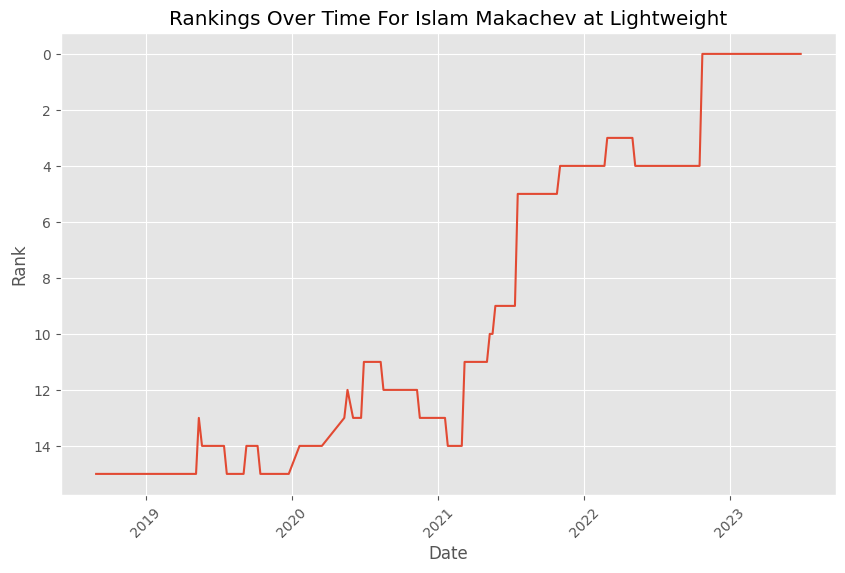

In [21]:
#using the ggplot style for all 4 vis. The 'plt.gca().invert_yaxis()' code inverts the frequencies on y-axis.(Since we want Rank)
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.plot(fighter_1['date'], fighter_1['rank'])
plt.title('Rankings Over Time For Islam Makachev at Lightweight')
plt.xlabel('Date')
plt.ylabel('Rank')
plt.gca().invert_yaxis()
plt.xticks(rotation = 45)
plt.grid(True)

0 indicates UFC Champion

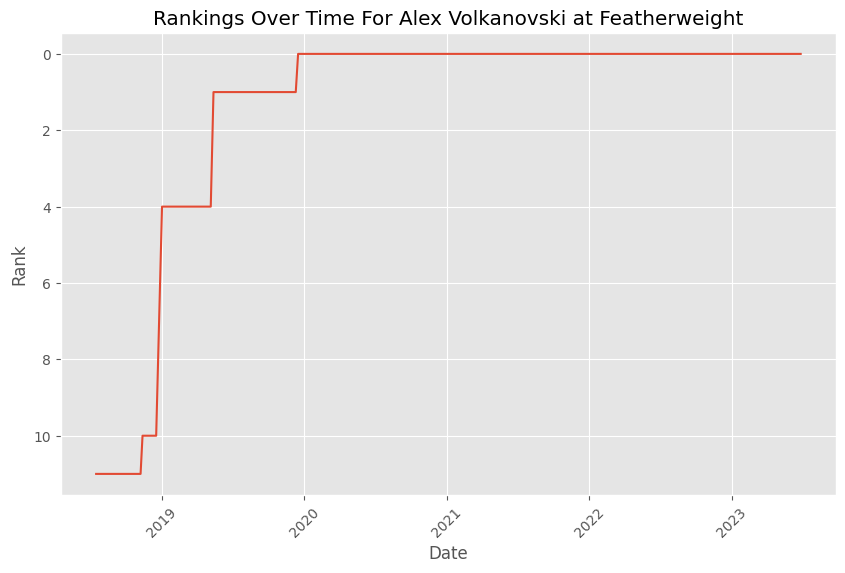

In [22]:
fighter_2 = ufc_rankings[ufc_rankings['fighter'] == 'Alexander Volkanovski']
plt.figure(figsize=(10,6))
plt.plot(fighter_2['date'], fighter_2['rank'])
plt.title('Rankings Over Time For Alex Volkanovski at Featherweight')
plt.xlabel('Date')
plt.ylabel('Rank')
plt.gca().invert_yaxis()
plt.xticks(rotation = 45)
plt.grid(True)

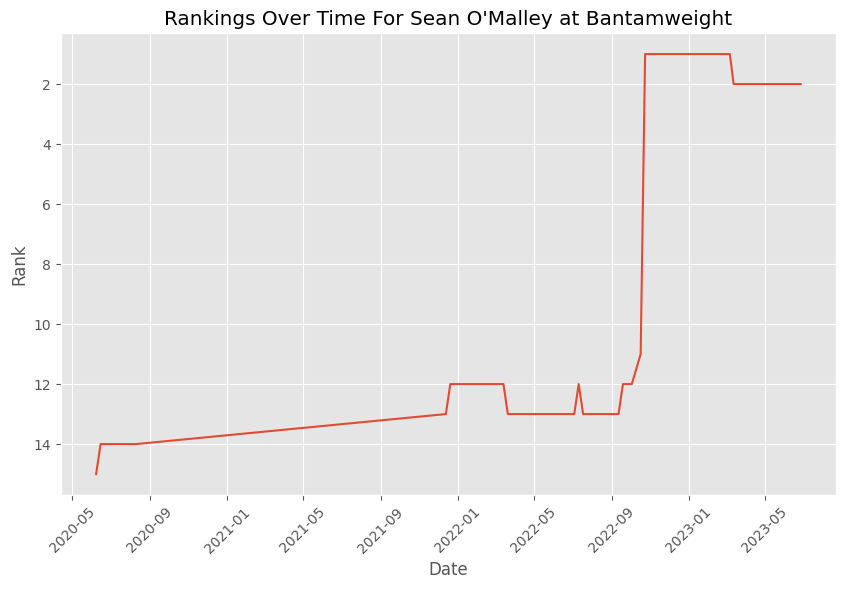

In [23]:
fighter_3 = ufc_rankings[ufc_rankings['fighter'] == "Sean O'Malley"]
plt.figure(figsize=(10,6))
plt.plot(fighter_3['date'], fighter_3['rank'])
plt.title("Rankings Over Time For Sean O'Malley at Bantamweight")
plt.xlabel('Date')
plt.ylabel('Rank')
plt.gca().invert_yaxis()
plt.xticks(rotation = 45)
plt.grid(True)

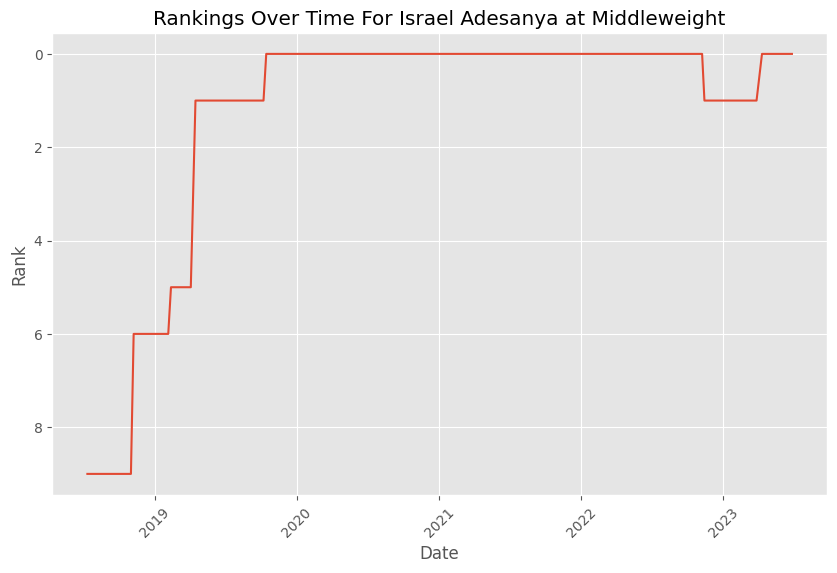

In [24]:
fighter_4 = ufc_rankings[ufc_rankings['fighter'] == "Israel Adesanya"]
plt.figure(figsize=(10,6))
plt.plot(fighter_4['date'], fighter_4['rank'])
plt.title("Rankings Over Time For Israel Adesanya at Middleweight")
plt.xlabel('Date')
plt.ylabel('Rank')
plt.gca().invert_yaxis()
plt.xticks(rotation = 45)
plt.grid(True)

Lets find out the longest regning Champion in the UFC

In [25]:
#ran into a problem where there were white spaces in our coulmn headers. Converted the column back to string type object.
ufc_rankings['rank'] = ufc_rankings['rank'].astype(str)
#now we can invoke .str.strip() on our rank variable.
champion_data = ufc_rankings[ufc_rankings['rank'].str.strip() == '0']
champion_data_grouped = champion_data.groupby('fighter')
lrc = None
lrc_duration = pd.Timedelta(0)
for champion, data in champion_data_grouped:
    earliest_date = data['date'].min()
    latest_date = data['date'].max()
    reign_duration = latest_date - earliest_date
    if reign_duration > lrc_duration:
        lrc_duration = reign_duration
        lrc = champion
print('The longest reigning champion is', lrc, 'with reign duration of', lrc_duration.days,'days')

The longest reigning champion is Jon Jones with reign duration of 3795 days


A visual for Jon Jon's Pound-for-Pound ranking over the years

In [26]:
p4p_rankings = pd.read_csv('p4p_data.csv')

In [27]:
p4p_rankings = p4p_rankings.dropna().reset_index(drop=True)
p4p_rankings

,date,p4p_fighter,p4p_rank
0,2013-02-04,Anderson Silva,1.0
1,2013-02-04,Jon Jones,2.0
2,2013-02-04,Georges St. Pierre,3.0
3,2013-02-04,José Aldo,4.0
4,2013-02-04,Benson Henderson,5.0
...,...,...,...
7454,2023-02-14,Raquel Pennington,13.0
7455,2023-02-14,Robert Whittaker,14.0
7456,2023-02-14,Katlyn Chookagian,14.0
7457,2023-02-14,Max Holloway,15.0


In [28]:
p4p_rankings['date'] = pd.to_datetime(p4p_rankings['date'])
p4p_rankings['year'] = p4p_rankings['date'].dt.year
p4p_rankings

,date,p4p_fighter,p4p_rank,year
0,2013-02-04,Anderson Silva,1.0,2013
1,2013-02-04,Jon Jones,2.0,2013
2,2013-02-04,Georges St. Pierre,3.0,2013
3,2013-02-04,José Aldo,4.0,2013
4,2013-02-04,Benson Henderson,5.0,2013
...,...,...,...,...
7454,2023-02-14,Raquel Pennington,13.0,2023
7455,2023-02-14,Robert Whittaker,14.0,2023
7456,2023-02-14,Katlyn Chookagian,14.0,2023
7457,2023-02-14,Max Holloway,15.0,2023


In [ ]:
p4p_rankings['year'] = p4p_rankings['date'].dt.year
p4p_rankings

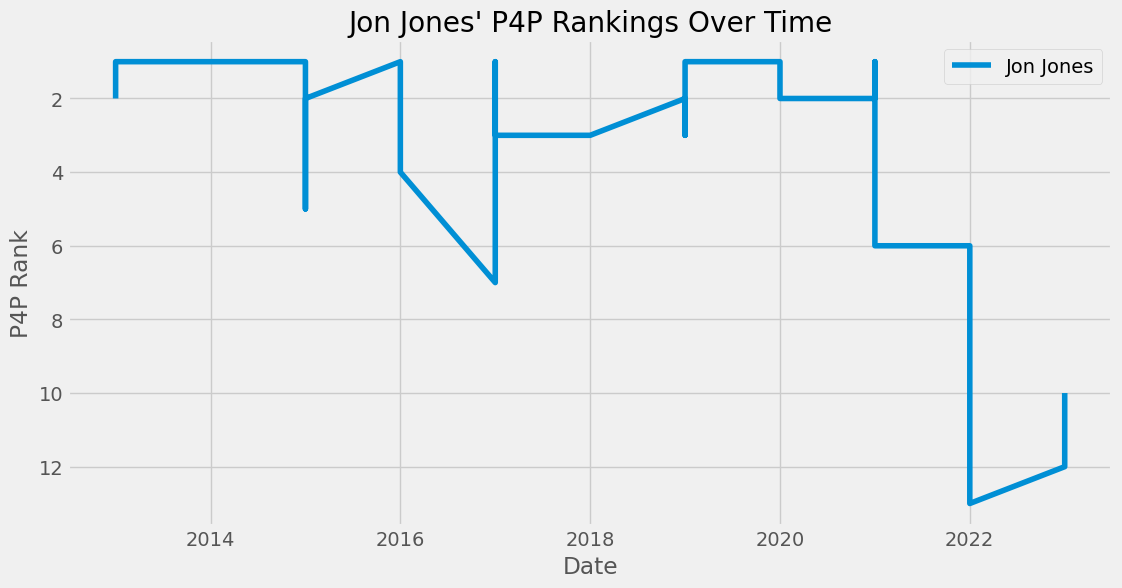

In [32]:
jon_jones_data = p4p_rankings[p4p_rankings['p4p_fighter'] == 'Jon Jones']
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 6))
plt.plot(jon_jones_data['year'], jon_jones_data['p4p_rank'], label='Jon Jones')
plt.xlabel('Date')
plt.ylabel('P4P Rank')
plt.title("Jon Jones' P4P Rankings Over Time")
plt.legend()
plt.grid(True)
plt.gca().invert_yaxis()